# Group Project Proposal
## Classification of The Presence of Heart Disease
* Jennifer Wang
* Hagan Cheung
* 
Justine Sog


### EXPLORING A DATASET
Before we can conduct data analysis, we must outline our goals and understand the information available through 3 different steps.
* Describing the variables in the heart disease data set.
* Loading the heart disease data.
* Preprocessing the heart disease data for comparison.

### Introduction
Coronary heart disease (or coronary artery disease, CAD) is a chronic heart condition characterized by obstruction of blood flow to the heart due to cholesterol and degenerative tissue plaque buildup (arteriosclerosis) in the coronary arteries; the O2 and nutrient deficiency in the heart caused by this disease leads to chest pain (angina pectoris) and heart attacks. As this is a irreversible and incurable condition, it is important to diagnose the disease as quickly as possible to slow the progression of the disease in order to prolong the patient’s life expectancy. Our chosen dataset observes the outputs of many variables that are hypothesized to play a role in diagnosing the disease and its progression in a number of patients (such as age and serum cholesterol content); we are curious to see how each variable aids in accurately diagnosing CAD, and aim to create a model that is able to predict CAD presence/progression in patients with high accuracy based on trends observed in the dataset. Additionally, we hope to identify a threshold or litmus in the variables to help in quantifying the likelihood of  CAD presence/progression. We hypothesize that there is a positive relationship between age and the other variables in the dataset, and that this relationship contributes to a higher likelihood of CAD presence. 

### Method
Our objective is to conduct a multiclass classification with more than two categories to answer a predictive question: can we use the attributes of the patient available to us to predict and distinguish the presence of heart disease in the patient? Our Class will be num, the diagnosis of heart disease (angiographic disease status) ranging from 0 to 4:
* presence in severity (values 1,2,3,4) and,
* absence (value 0).  

Given the following attributes and its description:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   * Value 1: typical angina
   * Value 2: atypical angina
   * Value 3: non-anginal pain
   * Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
13. ca: number of major vessels (0-3) colored by flourosopy
14. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
15. num: diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing

We plan to conduct data analysis to build a classifier using three different predictors (variables/columns):
* age: age in years.* chol: serum cholestoral in mg/d.
* thalach: maximum heart rate achieved.

To Summarize:
Our data analysis will be conducted using a classification model, and visualized with scatter plots. Our classifier will be the “num” column, which classifies the diagnosis of heart disease progression from 0 to 4 (0 being no presence, 4 being highly progressed). The predictors for the dataset that we will use have been narrowed down to four at present: age, serum cholesterol content (chol), maximum heart rate (thalach), and the number of major vessels visible by fluoroscopy (ca). We have initially chosen these variables given that they have numerical outputs and thus provide a good foundation for drafting a classification model; furthermore, they are highly relevant factors of  CAD and are expected to play major roles in achieving our objective of accurately diagnosing CAD. We hope to be able to increase the number of our predictors with further exploration of this project. 

### Expected outcomes and significanceWe expect to see a general trend in the data where an increase or positive deviation in most variables (e.g. age, serum cholesterol, etc.) is positively correlated with progression of CAD and with each other. For example, we expect to see that serum cholesterol content  is positively correlated with maximum heart rate, and that positive deviation in both these variables is correlated with the presence/progression of CAD. We also expect that these positive correlations are in turn increasingly positively  correlated with the presence/progression of CAD. The impact of these findings would be significant with regards to identifying a definite threshold or litmus in these variables, which could be extremely helpful in outlining a more concrete and reliable method of diagnosing CAD.D.


In [1]:
#loading in the library necessary
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("themis")
library(themis)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# read data
cleveland <- read_csv("original data/processed.cleveland.data", col_names = F)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# renaming variables for readability 
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                   "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [4]:
# filtering the heart disease data to only include our class and predictors
cleveland_filter <- cleveland |>
            select(age, chol, thalach, num) |>
            mutate(num = as_factor(num)) |>
            sample_n(300)
cleveland_filter

age,chol,thalach,num
<dbl>,<dbl>,<dbl>,<fct>
61,207,138,1
45,234,175,0
35,192,174,0
⋮,⋮,⋮,⋮
51,222,143,0
37,215,170,0
54,266,109,1


In [5]:
# find the number and percentage of differing presence of heart disease observations in our data set
# to check for class imbalance

num_obs <- nrow(cleveland_filter)
    cleveland_filter |>
    group_by(num) |>
    summarize(
        count = n(),
        percentage = n() / num_obs * 100)

num,count,percentage
<fct>,<int>,<dbl>
0,162,54.000000
1,54,18.000000
2,36,12.000000
3,35,11.666667
4,13,4.333333


In [6]:
# center, scaling and balancing the heart disease data
recipe <- recipe(num ~ ., data = cleveland_filter) |>
    step_scale(chol, thalach) |>
    step_center(chol, thalach) |>
    step_upsample(num, over_ratio = 1, skip = FALSE) |>
    prep()

preprocessed_cleveland <- bake(recipe, cleveland_filter)
preprocessed_cleveland

age,chol,thalach,num
<dbl>,<dbl>,<dbl>,<fct>
45,-0.2400182,1.1134119,0
35,-1.0490683,1.0697201,0
52,-0.8757004,0.3706518,0
⋮,⋮,⋮,⋮
58,1.3780820,-0.4158000,4
64,-0.6638064,-0.7653341,4
38,-0.2978075,1.4192543,4


In [7]:
# find the number and percentage of differing presence of heart disease observations in our data set
# double check class imbalance

num_obs <- nrow(preprocessed_cleveland)
    preprocessed_cleveland |>
    group_by(num) |>
    summarize(
        count = n(),
        percentage = n() / num_obs * 100)

num,count,percentage
<fct>,<int>,<dbl>
0,162,20
1,162,20
2,162,20
3,162,20
4,162,20


In [8]:
# create the TRAIN SET and TEST SET
set.seed(2000)

cleveland_split <- initial_split(preprocessed_cleveland, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split) 
cleveland_test <- testing(cleveland_split)

### Preliminary Exploratory Data Analysis

In [9]:
# create tbl to compare the average_age for each stage of heart disease presence and arrange by average_age
exploration_tbl1 <- cleveland_train |>
    group_by(num) |>
    summarize(average_age = mean(age)) |>
    arrange(average_age)

exploration_tbl1

num,average_age
<fct>,<dbl>
0,52.64463
1,54.66942
3,56.40496
2,58.52893
4,61.16529


In [10]:
# create tbl to compare average_chol for each stage of heart disease presence and arrange by average_colestoral
exploration_tbl2 <- cleveland_train |>
    group_by(num) |>
    summarize(average_colestoral = mean(chol)) |>
    arrange(average_colestoral)

exploration_tbl2

num,average_colestoral
<fct>,<dbl>
3,-0.08686861
0,-0.08161504
1,0.03682913
4,0.11881670
2,0.27355828


In [11]:
# create tbl to compare average_max_heartrate for each stage of heart disease presence and arrange by average_max_heartrate
exploration_tbl3 <- cleveland_train |>
    group_by(num) |>
    summarize(average_max_heartrate = mean(thalach)) |>
    arrange(average_max_heartrate)

exploration_tbl3

num,average_max_heartrate
<fct>,<dbl>
3,-0.8256360
2,-0.6107881
4,-0.4118280
1,-0.1319840
0,0.4468416


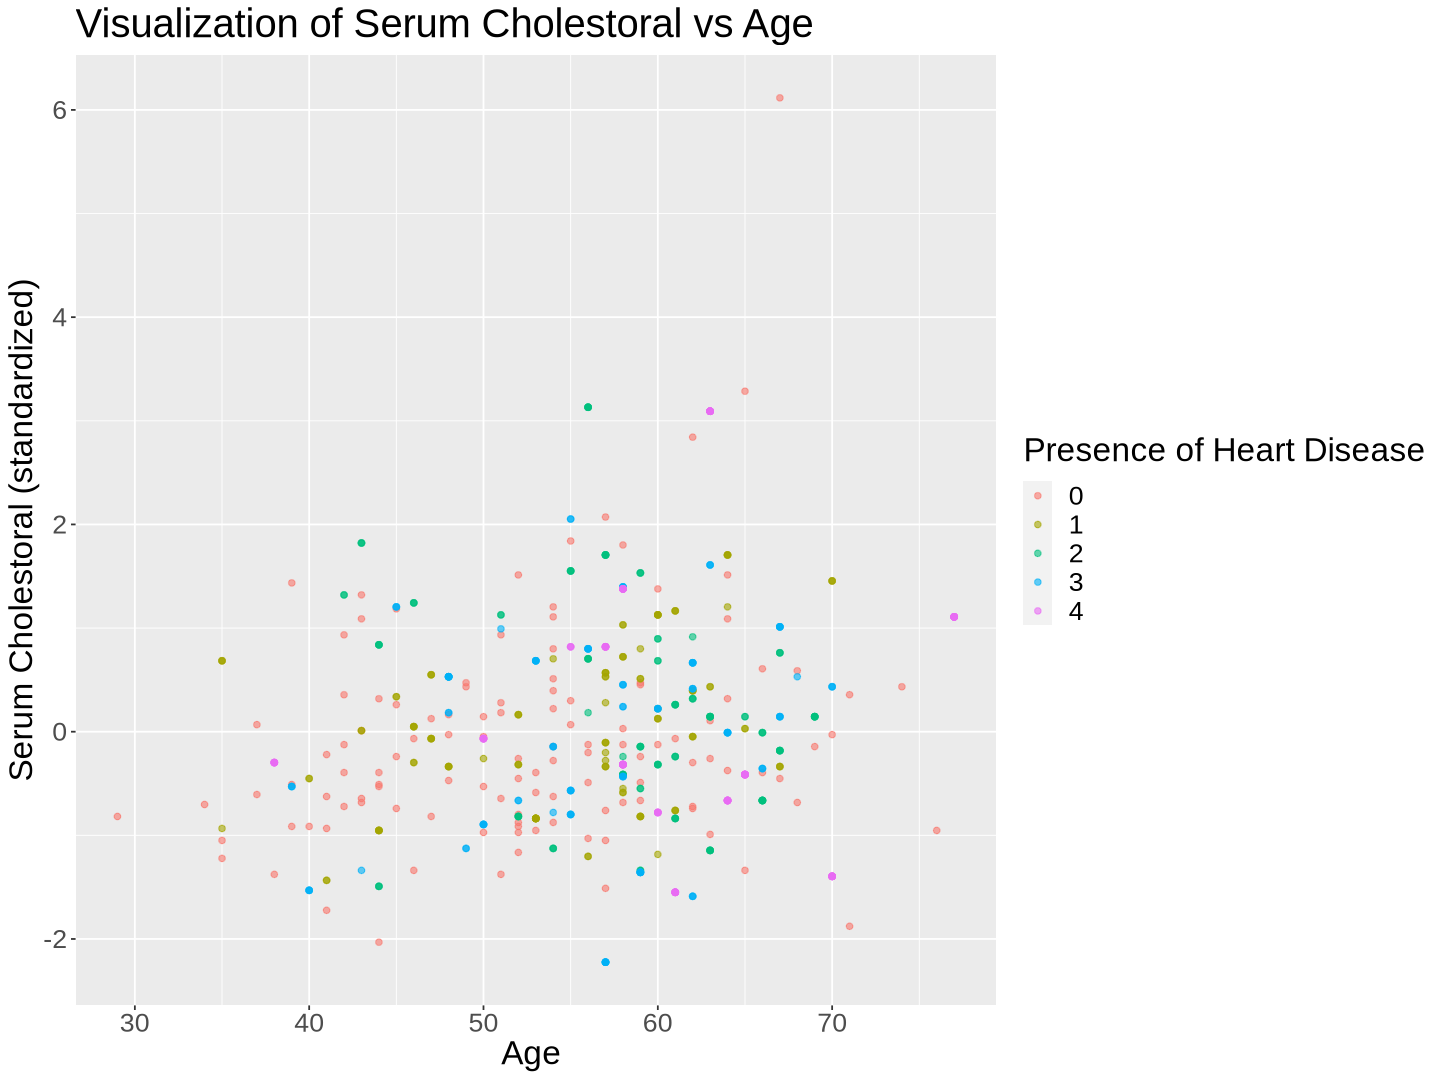

In [12]:
# draw a scatter plot to visualize the relationship between the age and chol (serum cholestoral in mg/d) predictors/variables

options(repr.plot.height = 9, repr.plot.width = 12)
exploration_plot1 <- cleveland_train |>
  ggplot(aes(x = age, y = chol, color = num)) +
  geom_point(alpha = 0.6) +
  labs(x = "Age ",
       y = "Serum Cholestoral (standardized)",
       color = "Presence of Heart Disease", 
       title = "Visualization of Serum Cholestoral vs Age") + 
  theme(text = element_text(size = 20))

exploration_plot1

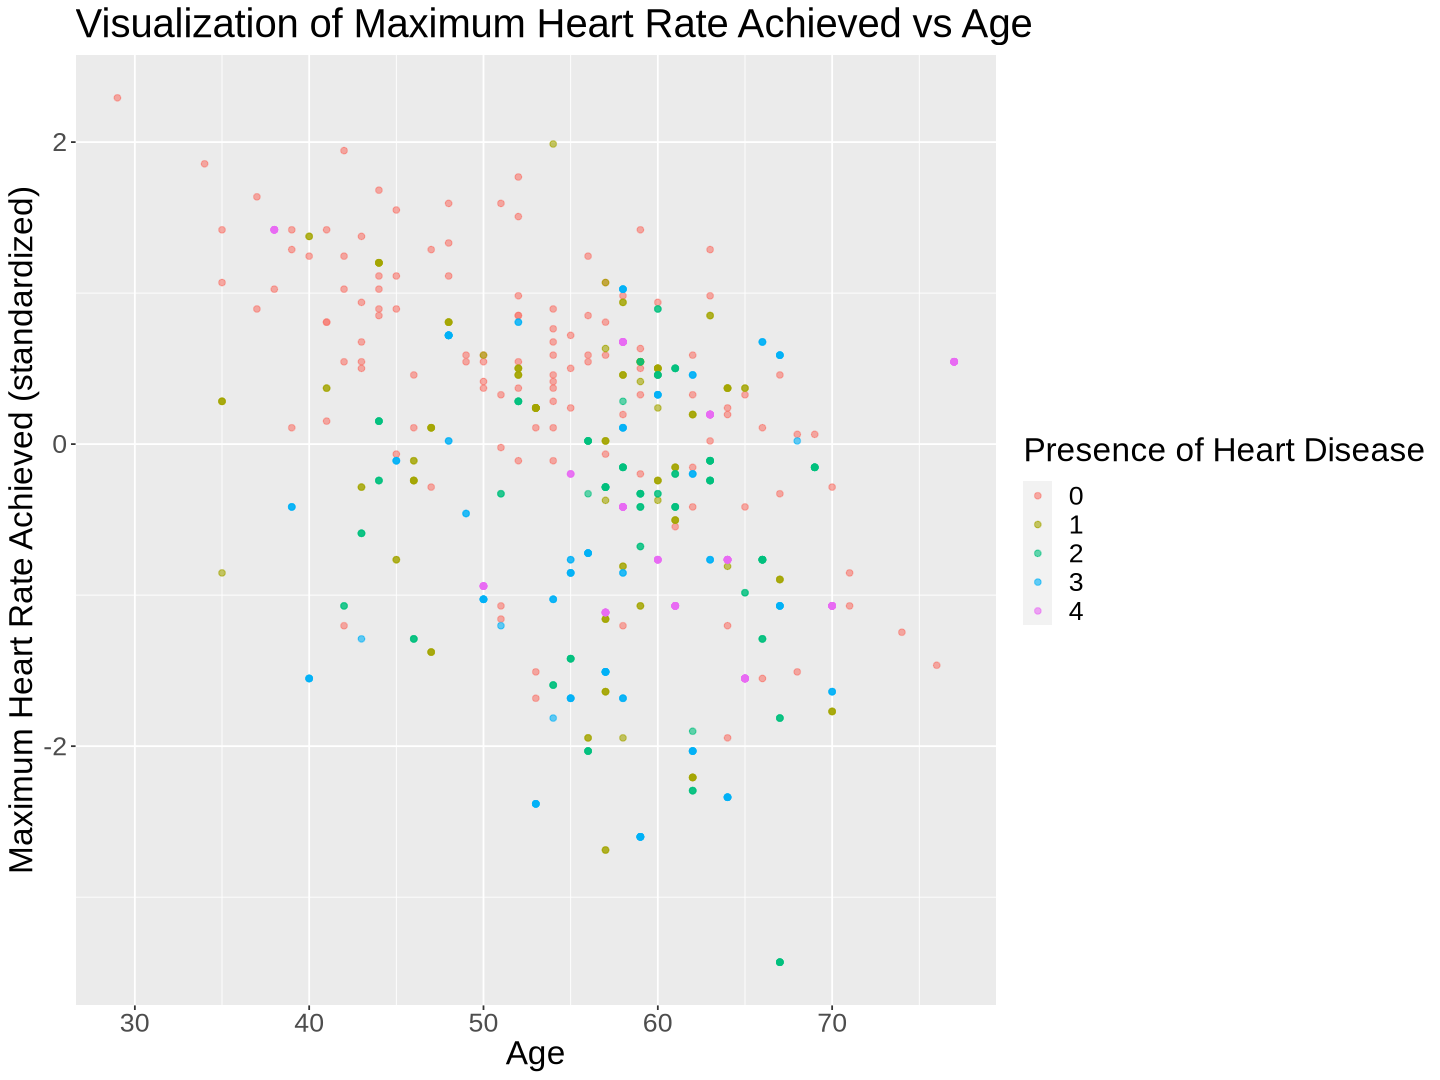

In [13]:
# draw a scatter plot to visualize the relationship between the age and thalach (maximum heart rate achieved) predictors/variables

options(repr.plot.height = 9, repr.plot.width = 12)
exploration_plot2 <- cleveland_train |>
  ggplot(aes(x = age, y = thalach, color = num)) +
  geom_point(alpha = 0.6) +
  labs(x = "Age",
       y = "Maximum Heart Rate Achieved (standardized)",
       color = "Presence of Heart Disease", 
       title = "Visualization of Maximum Heart Rate Achieved vs Age") + 
  theme(text = element_text(size = 20))

exploration_plot2

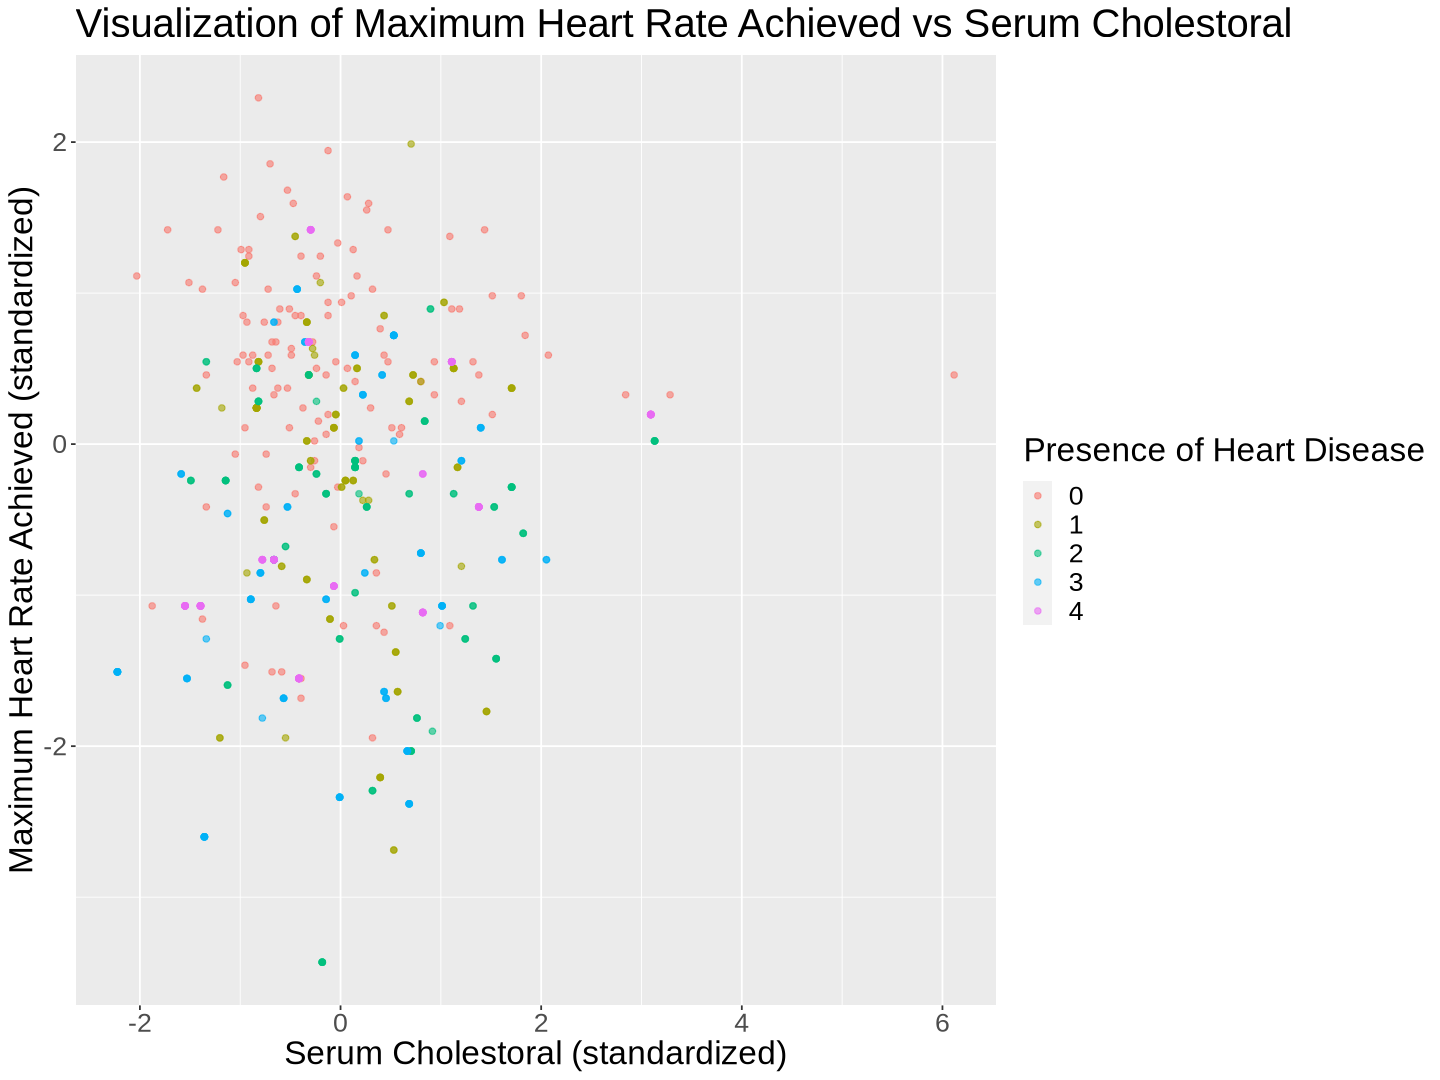

In [14]:
# draw a scatter plot to visualize the relationship between chol (serum cholestoral in mg/d) and thalach (maximum heart rate achieved) predictors/variables

options(repr.plot.height = 9, repr.plot.width = 12)
exploration_plot3 <- cleveland_train |>
  ggplot(aes(x = chol, y = thalach, color = num)) +
  geom_point(alpha = 0.6) +
  labs(x = "Serum Cholestoral (standardized)",
       y = "Maximum Heart Rate Achieved (standardized)",
       color = "Presence of Heart Disease", 
       title = "Visualization of Maximum Heart Rate Achieved vs Serum Cholestoral") + 
  theme(text = element_text(size = 20))

exploration_plot3

## Exploration Graph Analysis
Our tables are relevant in assisting our analysis towards answering our question, as it demonstrates the possible relationship between each predictor and our class. Where within all the tables one in particular clearly demonstrates that there are some positive relationship between the predictor age and num, the presence of heart disease.

Our plots help visually protray further relationship between more variables, whereas there is no clear relationship observed.

To conclude, within the previous tables and plots there does not seem to be any obvious relationship other than the positive relationship between age and the presence of heart disease. It is oberved that between age and the presence of heart disease, num, there is a moderately positive linear relationship where the increase of age has a correlationing increase in the presence of heart disease.

### Work Cited
Marateb HR, Goudarzi S. A noninvasive method for coronary artery diseases diagnosis using a clinically-interpretable fuzzy rule-based system. J Res Med Sci. 2015 Mar;20(3):214-23. PMID: 26109965; PMCID: PMC4468223.